# se2dr Fig Non aligned

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time


sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from se2waveload import *
from Lib_GeneralFunctions import *
from GeneratePaperFigs import *
from ModelIllustration import *

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [3]:
xx = np.linspace(-1.e4, 1.e4, 6001)

HorizontalZeroSDF = ZeroLevelSet(xx,Tiltfunc(xx, theta = 0), Tiltfunc_der(xx, theta = 0), "Horizontal SDF")
TiltedZeroSDF     = ZeroLevelSet(xx,Tiltfunc(xx, theta = 20*np.pi/180), Tiltfunc_der(xx, theta = 20*np.pi/180), "Tilted 20deg SDF")
SigmZeroSDF       = ZeroLevelSet(xx,func(xx),func_der(xx), "Sigmoid SDF")


# Colormap selection

In [4]:
from palettable.colorbrewer.diverging import PuOr_10_r as FieldColor

cmap = FieldColor.mpl_colormap

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5 as LineColor

cmapProf = ListedColormap(LineColor.mpl_colors[:])

# Extract the information for the profiles

## First the reference

In [5]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-0.txt", "0km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

pathTPV = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/[TPV3]Results/"

# Reference saved into a list of objects

RefListTPV =  [TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-0.0e+00.txt", "0km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-2.0e+03.txt", "2km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-4.0e+03.txt", "4km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-6.0e+03.txt", "6km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-8.0e+03.txt", "8km"),
              ]


# Now select the time snapshot of interest

In [6]:
start_time = time.time()
fname = "step-{timestep:04}_wavefield.pbin"
path = "/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_Sig_P3_25x25_2.5/"


i=7890
FieldFilename = os.path.join(path,fname.format(timestep=i))

MeshFilename = os.path.join(path, "default_mesh_coor.pbin")
se2_coor = se2wave_load_coordinates(MeshFilename)

In [7]:
FileList = glob(os.path.join(path,"step-{timestep}_wavefield.pbin".format(timestep="*")))
l = [i.replace(os.path.join(path,'step-'),'').replace('_wavefield.pbin','') for i in FileList]
l

['7890']

# Extract the fields for velocity and displacement in each component

In [8]:
TimeStepVal, LCoorX, LCoorY, LFieldX, LFieldY, LFieldvelX, LFieldvelY =  ExtractFields(FieldFilename, se2_coor)

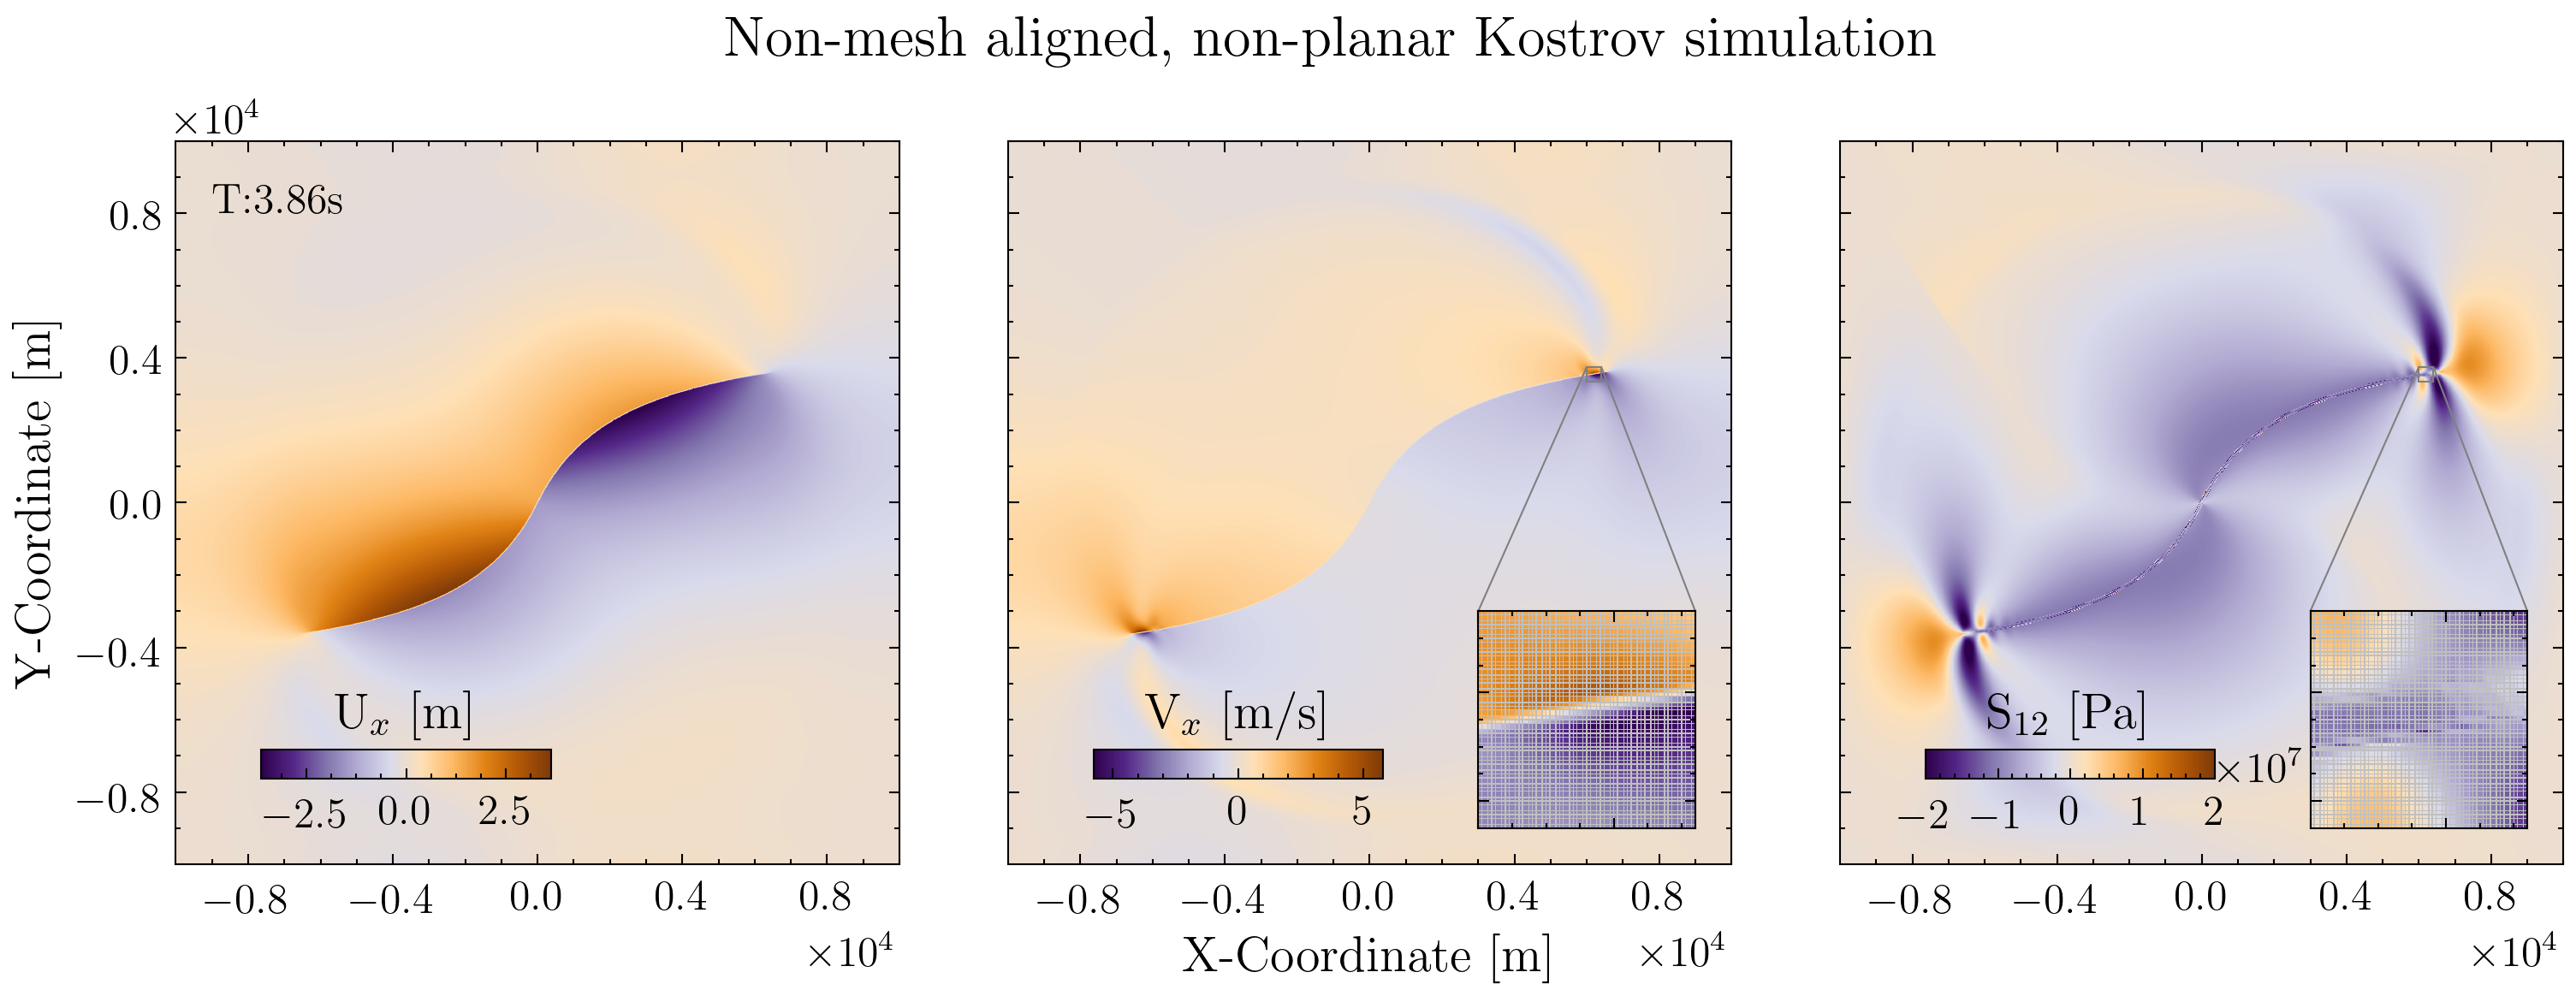

In [9]:
StressFromPickle = LoadPickleFile("/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Kos_Sig_P3_25x25_2.5/Out/", "StressInAPickle")
x0,y0 = 6200,3550
InsetAxis = [x0-200,x0+200,y0-200,y0+200]
F1, ax = PlotHalfSetup(LCoorX, LCoorY, LFieldX, LFieldvelX, StressFromPickle, 
           ["X-Component Displacement ", "X-Component Displacement [m]"],
           TimeStepVal,InsetAxis,
            cmap=cmap)

F1.suptitle("Non-mesh aligned, non-planar Kostrov simulation")
F1.patch.set_facecolor('white')